# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt

In [8]:
online_rt = pd.read_csv("Online_Retail.csv", engine="python")
display(online_rt.head())
display(online_rt.info())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

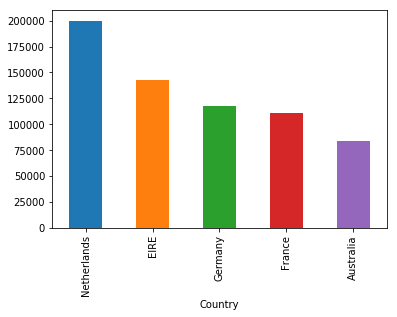

In [14]:
online_rt.groupby("Country").Quantity.sum().drop("United Kingdom").sort_values(ascending=False)[:5].plot.bar()

### Step 5.  Exclude negative Quatity entries

In [18]:
online_rt = online_rt[online_rt.Quantity > 0]

### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

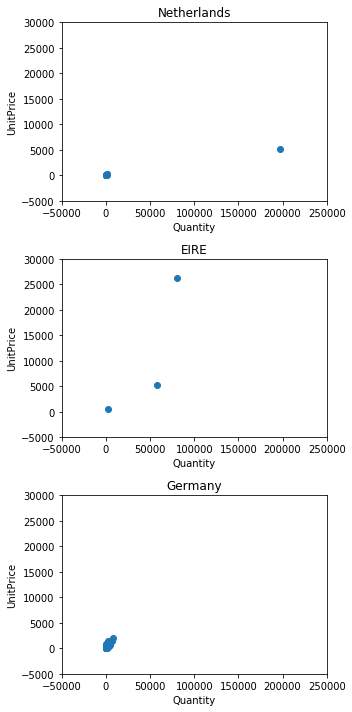

In [44]:
customers = online_rt.groupby(["CustomerID", "Country"]).sum()
customers = customers[customers.UnitPrice > 0]

customers["Country"] = customers.index.get_level_values(1)

top_countries = ['Netherlands', 'EIRE', 'Germany']

customers = customers[customers.Country.isin(top_countries)]

fig = plt.figure(figsize=(5, 10))
index = 1
for cc in top_countries:
    ax = fig.add_subplot(3, 1, index)
    index += 1
    
    dd = customers[customers.Country == cc]
#     ax.get_figure().figsize=(10, 5)
    ax.scatter(dd["Quantity"], dd["UnitPrice"])
    ax.set_title(cc)
    ax.set_xlabel("Quantity")
    ax.set_ylabel("UnitPrice")
    ax.set_ylim([-5000, 30000])
    ax.set_xlim([-50000, 250000])
    
# plt.show()
plt.tight_layout()

### BONUS: Create your own question and answer it.